In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import os
from sklearn.model_selection import train_test_split
import numpy as np

import keras.utils as image
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

2023-09-05 02:06:01.741127: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-05 02:06:01.779893: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-05 02:06:01.780290: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-05 02:06:02.557850: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import shutil
folders=os.listdir('data')
#os.mkdir('train')
#os.mkdir('test')
#for i in folders:
    #os.mkdir(f'train/{i}')
    #os.mkdir(f'test/{i}')
Train_files=[]
Test_files=[]
for i in folders:
    all_files=os.listdir(f'data/{i}')
    Train_files,Test_files=train_test_split(all_files,test_size=50)
    #for j in Train_files:
     #   shutil.copy(f'data/{i}/{j}',f'train/{i}')
    for j in Test_files:
        pass
     #   shutil.copy(f'data/{i}/{j}',f'test/{i}')

In [3]:
show_file=[f'data/{i}/{Test_files[-1]}',f'data/{i}/{Test_files[-2]}',f'data/{i}/{Test_files[-3]}']
show_file=f'data/{i}/{Test_files[-1]}'

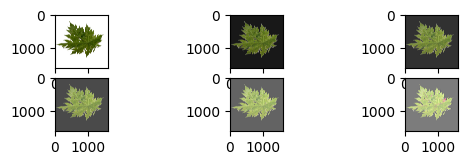

In [4]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
show_file='data/Pepaya/Pepaya008.jpg'
j=1
change_fac=0
for i in range(1,7):
    sp = plt.subplot(6,3,i)
    img = Image.open(show_file)
    img=img.resize((1600,1600))
    img=np.array(img)+change_fac
    plt.imshow(img)
    change_fac+=25
plt.savefig('leaf.png')

In [5]:
plt.savefig('leaf.jpg')

<Figure size 640x480 with 0 Axes>

In [6]:
plt.savefig("leaf.png")

<Figure size 640x480 with 0 Axes>

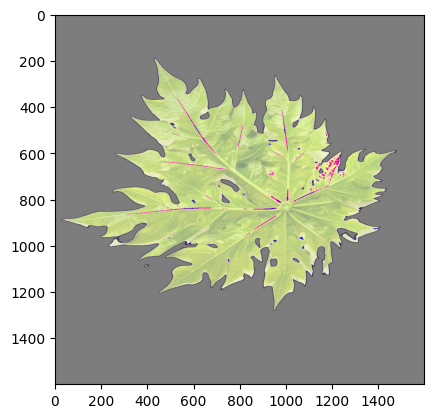

In [7]:
plt.imshow(img+1)
plt.savefig('leaf1.png')

In [12]:
train_datagen = ImageDataGenerator(rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        #rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest') 
training_set = train_datagen.flow_from_directory('train',target_size=(200,200),
                                                 batch_size = 10
                                                 ,classes=os.listdir('data'))
test_datagen = ImageDataGenerator(rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        #rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
validation_set = test_datagen.flow_from_directory('test',target_size=(200,200),
                                            batch_size = 10,classes=os.listdir('data'))

Found 3000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [18]:
for i in training_set:
    print(i[0].shape)
    break

(10, 200, 200, 3)


In [22]:
tf.keras.backend.clear_session()
inputs=inputs = tf.keras.Input(shape=(200,200, 3))
convo1= tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu')(inputs)
maxpool1=tf.keras.layers.MaxPool2D(pool_size=3, strides=2)(convo1)
convo2= tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu')(maxpool1)
maxpool2=tf.keras.layers.MaxPool2D(pool_size=3, strides=2)(convo2)
flatten=tf.keras.layers.Flatten()(maxpool2)
#dropout1=tf.keras.layers.Dropout(0.5)(flatten)
dence1=tf.keras.layers.Dense(100,activation='relu')(flatten)
#outputs=tf.keras.layers.Dense(10,activation='softmax')(dence1)
outputs = tf.keras.layers.Dense(10, activation='softmax')(dence1)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer ='adam' , loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history=model.fit(x = training_set, validation_data = validation_set, epochs = 5,steps_per_epoch=100)

Epoch 1/5
100/100 [==============================] - 76s 758ms/step - loss: 9.0888 - accuracy: 0.1340 - val_loss: 0.4273 - val_accuracy: 0.2140
Epoch 2/5
100/100 [==============================] - 74s 743ms/step - loss: 0.4023 - accuracy: 0.1990 - val_loss: 0.3776 - val_accuracy: 0.1980
Epoch 3/5
 19/100 [====>.........................] - ETA: 46s - loss: 0.3758 - accuracy: 0.1895